C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[['LF' 0 3.5 ..., 0.0 0.0 0.0]
 ['FR' 0 3.5 ..., 0.0 0.0 0.0]
 ['LF' 0 3.5 ..., 0.0 0.0 0.0]
 ..., 
 ['FR' 1 3.5 ..., 0.0 0.0 0.0]
 ['LF' 0 3.5 ..., 0.0 0.0 0.0]
 ['FR' 1 3.5 ..., 0.0 0.0 0.0]]
10500 train samples
3150 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               22016     
_________________________________________________________________
activation_31 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_32 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
__________________________________________

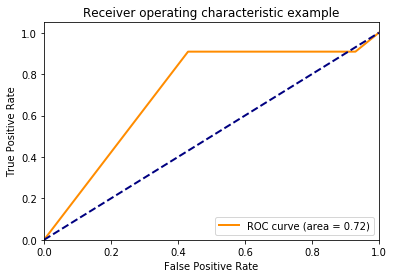

Average precision score, micro-averaged over all classes: 0.50


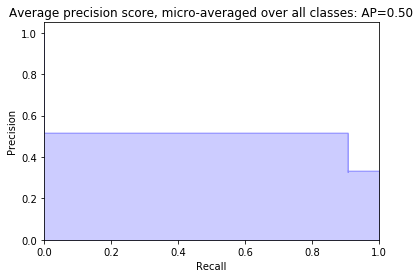

In [7]:
#program that prints the confusion matrix, ROC curve and PR graph for the output from the neural network model

from __future__ import print_function
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout

from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

np.random.seed(1671)
NB_EPOCH = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 3
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT=0.4
RESHAPED = 171
dataframe_train = pandas.read_csv("TrainingEdgesToAction.csv", header=None)
dataset_train_v = dataframe_train.values
#dataset_train = shuffle(dataset_train,random_state=0)
dataset_train_f = dataset_train_v[1:,0:172]
#print(dataset_train_f)
dataset_train_n = shuffle(dataset_train_f)
print(dataset_train_n)

X_train = dataset_train_n[0:,1:172].astype(float)
Y_train = dataset_train_n[0:,0]

#Y_train = shuffle(Y_test,random_state=0)

dataframe_test = pandas.read_csv("TestingEdgesToAction.csv", header=None)
dataset_test = dataframe_test.values
dataset_test_ft = dataset_test[1:,0:172]
dataset_test_nt = shuffle(dataset_test_ft)
X_test = dataset_test_nt[0:,1:172].astype(float)
Y_test = dataset_test_nt[0:,0]

#X_test = dataset_test[1:,1:172].astype(float)
#Y_test = dataset_test[1:,0]


X_train = X_train.reshape(10500,RESHAPED)
X_test = X_test.reshape(3150,RESHAPED)
X_train /= 255
X_test /= 255




print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')


le = preprocessing.LabelEncoder()
le.fit(["Default", "FR", "LF"])
LabelEncoder()
list(le.classes_)
dummy_y_test_o=le.transform(Y_test)
dummy_y_train_o=le.transform(Y_train)

dummy_y_test=to_categorical(dummy_y_test_o)
dummy_y_train=to_categorical(dummy_y_train_o)

model = Sequential()
model.add(Dense(N_HIDDEN,input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
history = model.fit(X_train,dummy_y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test,dummy_y_test,verbose=VERBOSE)

print("\nTest score:",score[0])
print("Test accuracy:",score[1])


y_score = model.predict(X_test)
y_score = (y_score > 0.5)
print(y_score)
y_score_f=y_score.argmax(1)

print("True Values: ",dummy_y_test_o)
print("Predicted Values: ",y_score_f)
cm = confusion_matrix(dummy_y_test_o, y_score_f)
print("Confusion Matrix: ")
print(cm)

n_classes = dummy_y_test.shape[1]
print(n_classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(dummy_y_test_o, y_score_f,pos_label=2)
roc_auc = auc(fpr, tpr)
    
    
print("FPR: ",fpr)
print("TPR: ",tpr)
print("ROC_AUC: ",roc_auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(dummy_y_test_o,
                                                        y_score_f,pos_label=2)
    average_precision[i] = average_precision_score(dummy_y_test[:,i], y_score[:,i],)

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(dummy_y_test_o.ravel(),
    y_score_f.ravel(),pos_label=2)
average_precision["micro"] = average_precision_score(dummy_y_test[:,i], y_score[:,i],
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))


plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

plt.show()